In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob, os

#1、读取files_initial下所有jpg图像
files_initial = glob.glob("pic_initial/*.jpg")

#2、图像分割、将分割后的图像保存在pic_processed中
for i in range(len(files_initial)):
    img = cv2.imread(files_initial[i],0)
    ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel_size = (20,20) #可调参
    img = cv2.blur(mask_OTSU, kernel_size)
    ret2, mask_OTSU = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    kernel = np.ones((15,15), np.uint8) #可调参
    dst = cv2.morphologyEx(mask_OTSU, cv2.MORPH_OPEN, kernel)
    cv2.imwrite("pic_processed/"+str(i)+".jpg",dst)  
    #绘制查看效果
    '''
    plt.figure(figsize=(8, 6))
    plt.imshow(dst,cmap='gray')
    plt.axis("off")
    plt.show()
    '''

In [2]:
#3、调整分辨率（减少后续处理时间）
from PIL import Image
import glob, os

size = [792, 594] #可调参

for infile in glob.glob("pic_processed/*.jpg"):
    file, ext = os.path.splitext(infile)
    im = Image.open(infile)
    im.thumbnail(size)
    im.save(file + ".jpg", "JPEG")

In [3]:
#4、利用cellpose算法，处理得到mask图
from cellpose import models
from cellpose.io import imread

model = models.CellposeModel(model_type='CP')
files = glob.glob("pic_processed/*.jpg")
imgs = [imread(f) for f in files]
masks, flows, styles = model.eval(imgs, diameter=100, channels=[0,0],
                                  flow_threshold=0.7, cellprob_threshold=-4,do_3D=False)#可调参

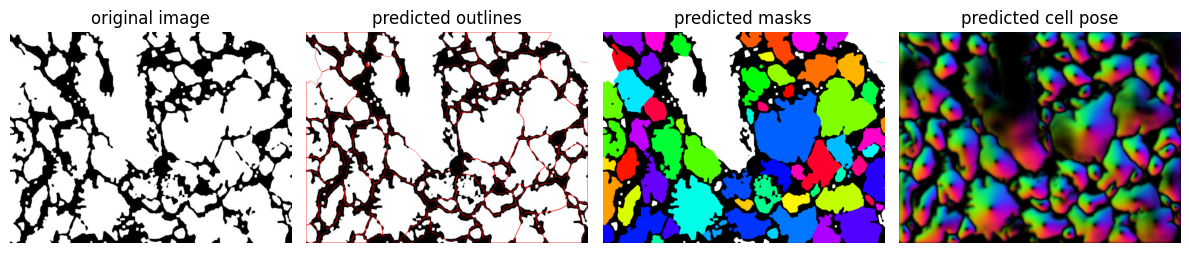

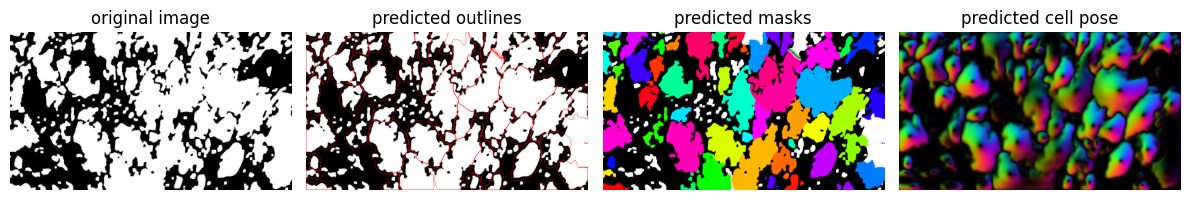

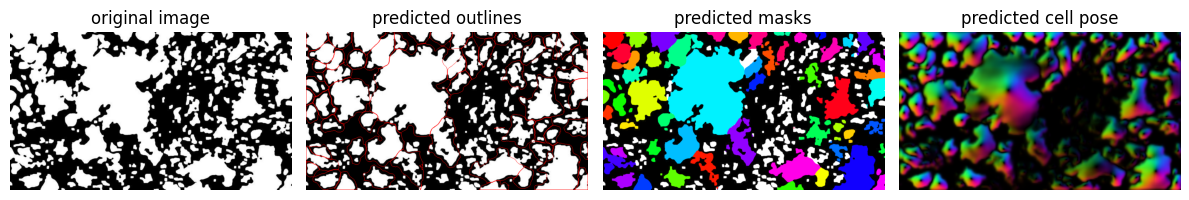

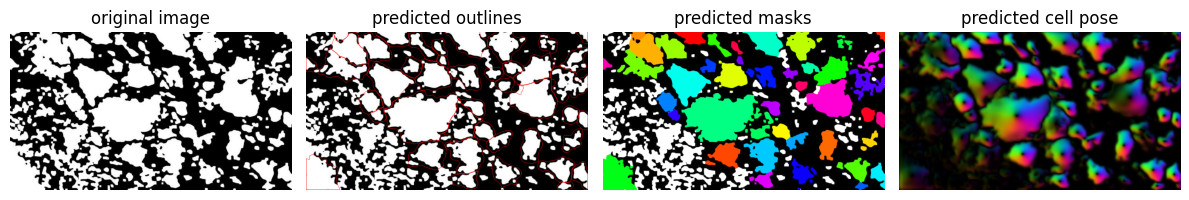

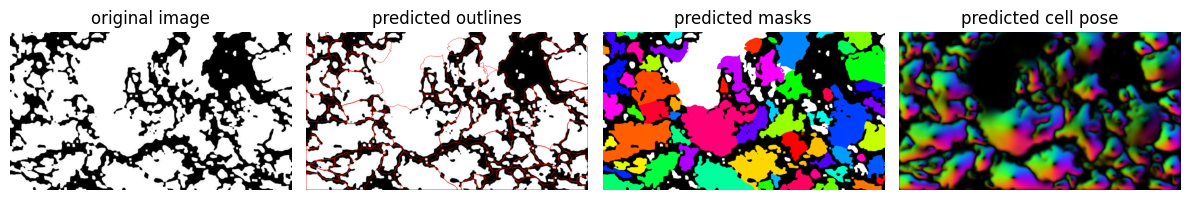

In [4]:
#查看cellpose处理效果用
'''
from cellpose import plot
import matplotlib.pyplot as plt
nimg = len(imgs)
channels = [[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]]
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]
    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
    plt.tight_layout()
    plt.show()
'''

In [5]:
#5、存储mask图
import cv2
for i in range(len(masks)):
    cv2.imwrite("pic_over/"+str(i)+".png",masks[i])

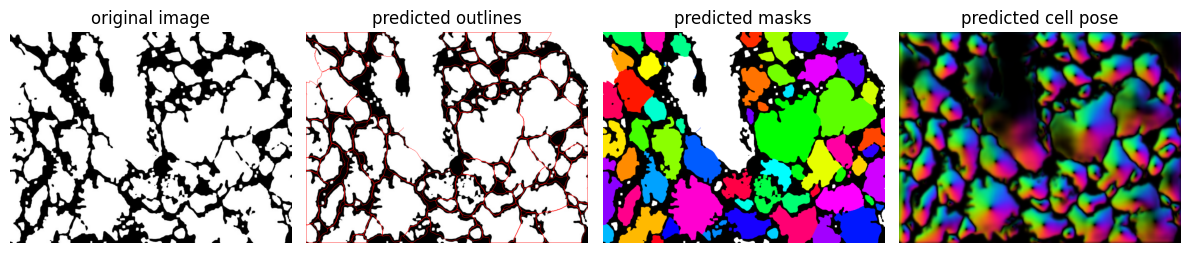

In [2]:
#调节cellpose参数用
'''
from cellpose import models
from cellpose.io import imread

model = models.CellposeModel(model_type='CP')
files = ["pic_processed/4.jpg"]
imgs = [imread(f) for f in files]
masks, flows, styles = model.eval(imgs, diameter=100, channels=[0,0],
                                  flow_threshold=0.7,cellprob_threshold=-4,do_3D=False)
from cellpose import plot
import matplotlib.pyplot as plt
nimg = len(imgs)
channels = [[0,0], [0,0], [0,0], [0,0], [0,0], [0,0], [0,0]]
for idx in range(nimg):
    maski = masks[idx]
    flowi = flows[idx][0]
    fig = plt.figure(figsize=(12,5))
    plot.show_segmentation(fig, imgs[idx], maski, flowi, channels=channels[idx])
    plt.tight_layout()
    plt.show()
'''

In [ ]:
#6、imageJ运行deal.py生成参数表格